In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

In [2]:
df = pd.read_csv("/Users/carnevale10/Desktop/HospInfo.csv")
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [3]:
nrows = df.shape[0]
num_unique_hosp = df['Provider ID'].nunique()
print("Is Provider ID a unique identifier?: {0}".format(nrows == num_unique_hosp))

Is Provider ID a unique identifier?: True


In [4]:
df = df.replace('Not Available', np.nan)
cols_to_drop = list(df.filter(regex='footnote'))
df_clean = df[df.columns.drop(cols_to_drop)]
df_clean

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,True,4,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,CLEAR LAKE REGIONAL MEDICAL CENTER,500 MEDICAL CENTER BLVD,WEBSTER,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,...,True,3,Above the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410..."
4808,520194,ORTHOPAEDIC HOSPITAL OF WISCONSIN,475 W RIVER WOODS PKWY,GLENDALE,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,...,NaN,NaN,NaN,NaN,NaN,Above the national average,NaN,NaN,NaN,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982..."
4809,491302,CARILION GILES COMMUNITY HOSPITAL,159 HARTLEY WAY,PEARISBURG,VA,24134,GILES,5409216000,Critical Access Hospitals,Voluntary non-profit - Private,...,True,4,Same as the national average,NaN,Same as the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -..."
4810,510012,PLEASANT VALLEY HOSPITAL,2520 VALLEY DRIVE,POINT PLEASANT,WV,25550,MASON,3046754340,Acute Care Hospitals,Voluntary non-profit - Private,...,True,3,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Below the national average,Above the national average,Same as the national average,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868..."


In [5]:
df_clean['Patient experience national comparison'].value_counts(normalize=True)

Above the national average      0.352599
Same as the national average    0.333430
Below the national average      0.313970
Name: Patient experience national comparison, dtype: float64

In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

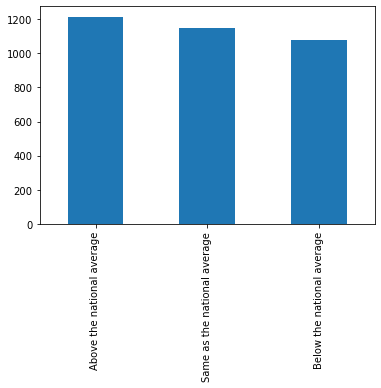

In [7]:
df_clean['Patient experience national comparison'].value_counts().plot(kind='bar')